In [29]:
import torch
import math
from torch import Tensor
import matplotlib.pyplot as plt 

# imports from this same folder
import loadData
import baseline
import optim
import modules
import trainAndTest
import numpy as np

%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
torch.manual_seed(40)
print('Pytorch version: ',torch.__version__)
PLOT_FOLDER = 'plot_folder/'

Pytorch version:  0.3.1.post2


In [31]:
# Generate data with target 0 if outside the circle or 1 if inside
train_input, train_target = loadData.generate_disc_set(1000)
test_input, test_target = loadData.generate_disc_set(1000)

# see if data are close to be balanced and plot the dataset
loadData.plot_data(train_input, train_target, show_plot = False)

# check what accuracy we could expect with a simple baseline
# e.g. with a linear classifier after having added the L2 norm of the points
baseline.baseline_linear_model(train_input,train_target,test_input,test_target)

# convert targets to one-hot encoding
train_target = loadData.convert_to_one_hot(train_target)
test_target  = loadData.convert_to_one_hot(test_target)
print('Targets converted to one-hot')

# Normalize inplace the data
loadData.normalize_data(train_input)
loadData.normalize_data(test_input)

    

#samples:        torch.Size([1000, 2])
Are the classes balanced?
#true_samples:   torch.Size([504, 2])
#false_samples:  torch.Size([496, 2])
Baseline accuracy: 99.1 %
Targets converted to one-hot


In [4]:
train_target



    0     1
    0     1
    0     1
     ⋮      
    0     1
    1     0
    0     1
[torch.FloatTensor of size 1000x2]

In [5]:
print(torch.log(Tensor([[0.4, 0.6]])))
print(torch.log(Tensor([[0.2, 0.3]])))


-0.9163 -0.5108
[torch.FloatTensor of size 1x2]


-1.6094 -1.2040
[torch.FloatTensor of size 1x2]



In [77]:
# create the model
x = (Tensor([[0.4, 0.6],[0.2,0.3],[0.5, 0.6]]))
t = (torch.Tensor([[0,1],[1,0],[0,1]]))
print('t:',t)
loss = modules.LossBCE()

loss.forward(x,t)


t: 
 0  1
 1  0
 0  1
[torch.FloatTensor of size 3x2]



0.6986228028933207

In [ ]:
ids = torch.Tensor([1,1,0,0]).long()
print(m.gather(1, ids.view(-1,1)))

In [69]:
a = torch.Tensor([[0,1],[1,0],[0,1]])
b = Tensor([[2,3],[4,5],[6,7]])
(b*a).sum(1)
a[:,0]
b.gather(1,a[:,0].long().view(-1,1))


 2
 5
 6
[torch.FloatTensor of size 3x1]

In [32]:
optimizers = [optim.SGDOptimizer, optim.SGDmomOptimizer, optim.AdamOptimizer, optim.BFGSOptimizer]
losses = [modules.LossMSE, modules.LossBCE]

100%|██████████| 250/250 [00:02<00:00, 111.99it/s]


optimizer:  Adam
learning rate:  0.005
minimum loss:  11.962425410747528
mean loss:  19.321838373601437
maximum accuracy:  999
On test:  969


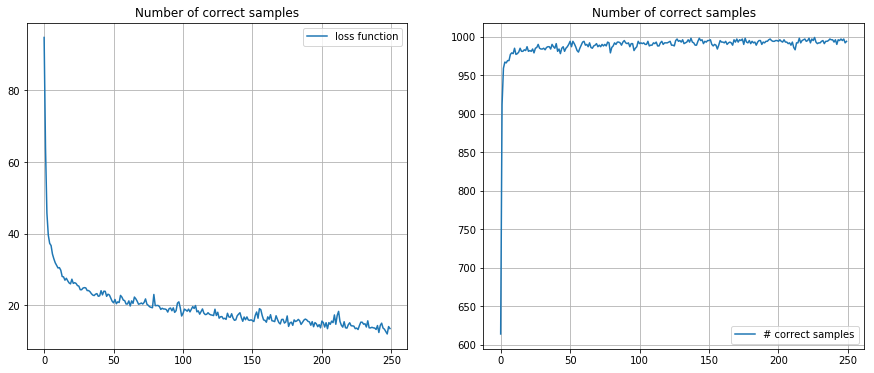

100%|██████████| 250/250 [00:02<00:00, 99.51it/s] 


optimizer:  Adam
learning rate:  0.005
minimum loss:  11.56270918250084
mean loss:  18.258466439694168
maximum accuracy:  998
On test:  962


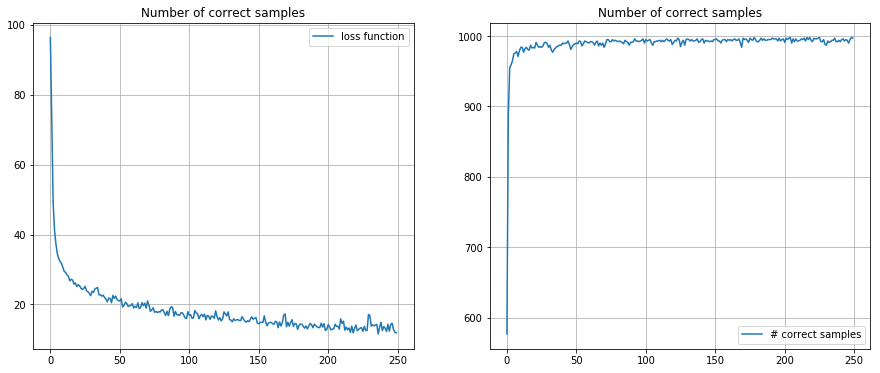

100%|██████████| 250/250 [00:02<00:00, 97.86it/s]


optimizer:  Adam
learning rate:  0.005
minimum loss:  12.247104525566101
mean loss:  19.421197766177357
maximum accuracy:  1000
On test:  957


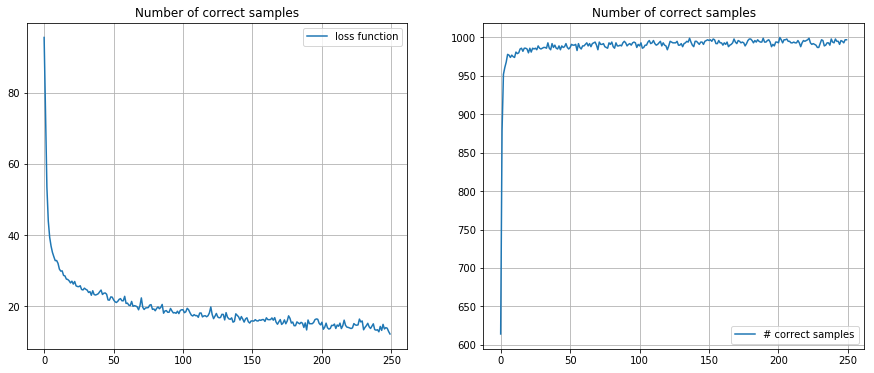

100%|██████████| 250/250 [00:02<00:00, 105.44it/s]


optimizer:  Adam
learning rate:  0.005
minimum loss:  11.432055234909058
mean loss:  18.00827351285424
maximum accuracy:  999
On test:  964


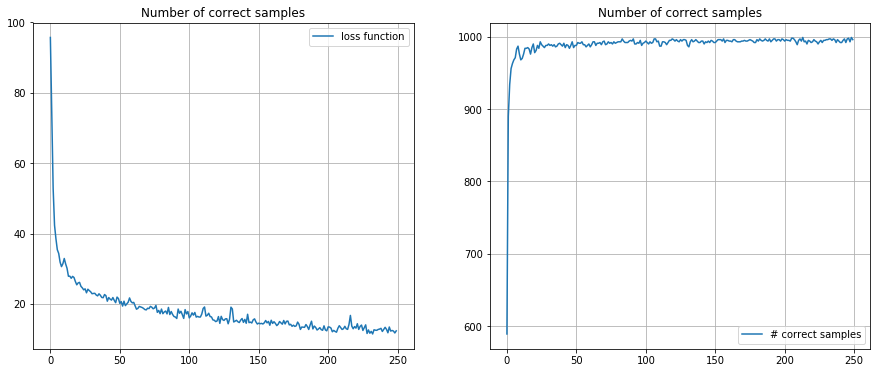

100%|██████████| 250/250 [00:02<00:00, 114.04it/s]


optimizer:  Adam
learning rate:  0.005
minimum loss:  12.089370585978031
mean loss:  19.561558715358377
maximum accuracy:  1000
On test:  972


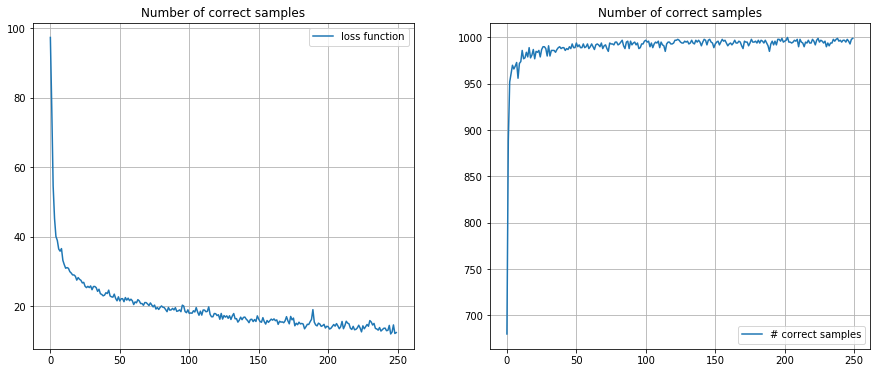

100%|██████████| 250/250 [00:02<00:00, 111.94it/s]


optimizer:  Adam
learning rate:  0.005
minimum loss:  11.741740002296865
mean loss:  18.45153611154668
maximum accuracy:  999
On test:  960


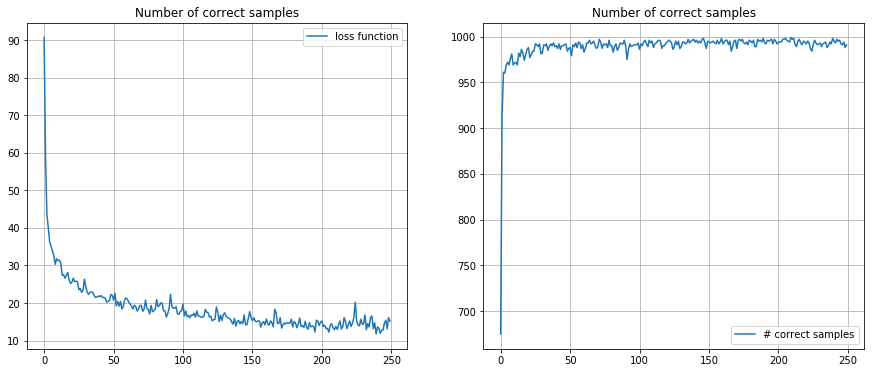

100%|██████████| 250/250 [00:02<00:00, 121.54it/s]


optimizer:  Adam
learning rate:  0.005
minimum loss:  10.151475373655558
mean loss:  18.24070773077011
maximum accuracy:  999
On test:  953


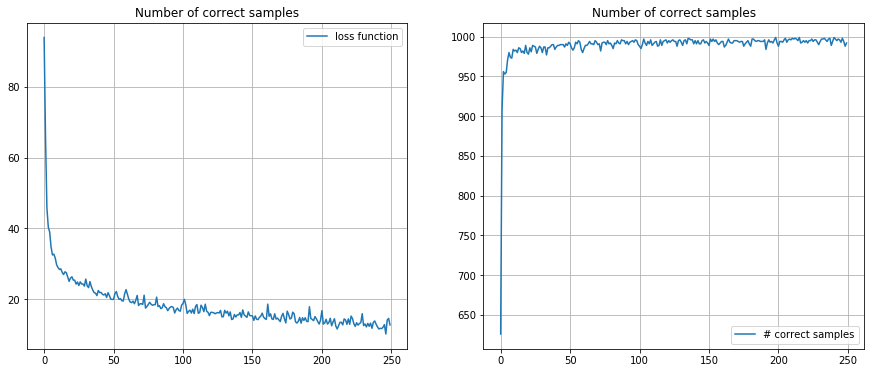

100%|██████████| 250/250 [00:02<00:00, 119.56it/s]


optimizer:  Adam
learning rate:  0.005
minimum loss:  11.219249911606312
mean loss:  19.176994384497405
maximum accuracy:  999
On test:  965


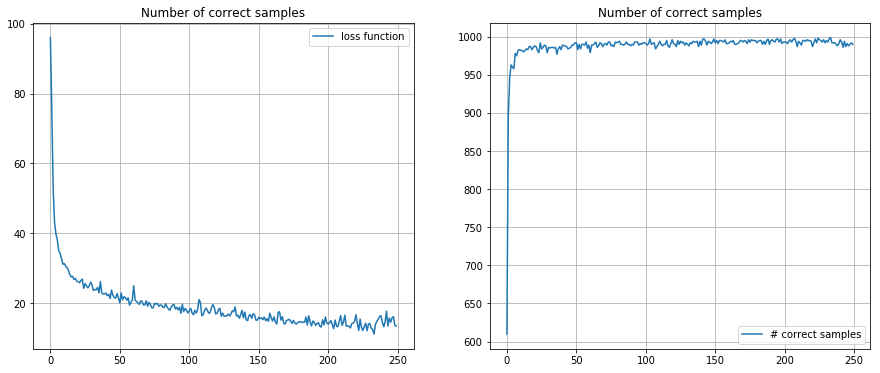

100%|██████████| 250/250 [00:02<00:00, 119.49it/s]


optimizer:  Adam
learning rate:  0.005
minimum loss:  14.570510908961296
mean loss:  20.48340120336041
maximum accuracy:  996
On test:  968


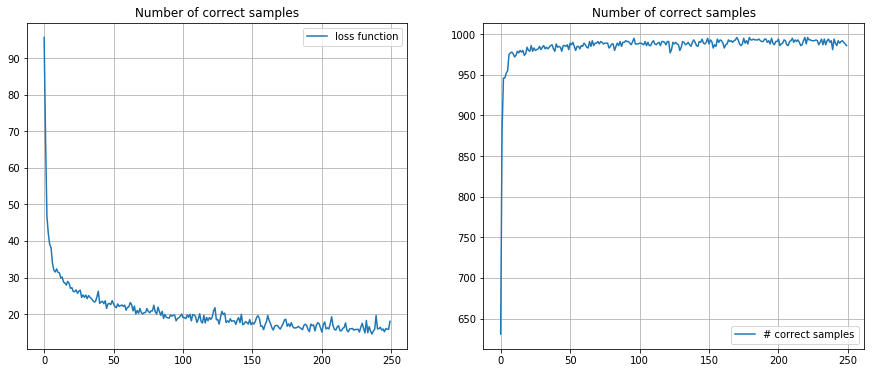

100%|██████████| 250/250 [00:02<00:00, 124.11it/s]


optimizer:  Adam
learning rate:  0.005
minimum loss:  12.297878354787827
mean loss:  18.68872464271635
maximum accuracy:  999
On test:  968


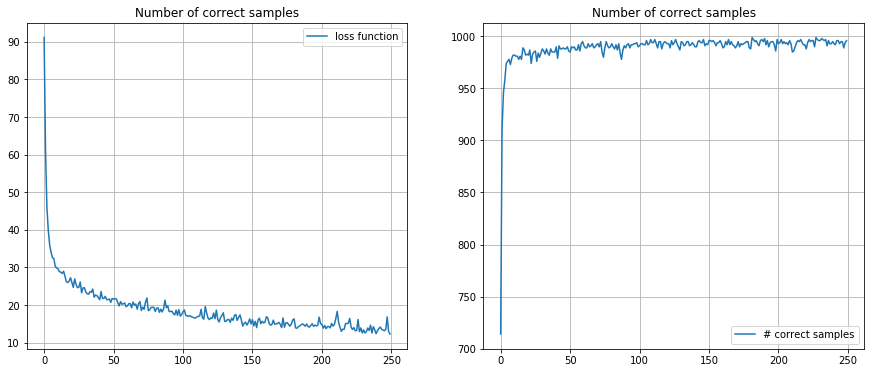

In [88]:
lr = 0.005
loss_lists = []
train_accs = []
for i in range(10):
    Lin1 = modules.Linear(2,25)
    Lin2 = modules.Linear(25,25)
    Lin3 = modules.Linear(25,2)
    act1 = modules.LeakyReLU()
    act2 = modules.LeakyReLU()
    act3 = modules.Tanh()
    act4 = modules.Sigmoid()
    layers = [
        Lin1,
        modules.ReLU(),
        Lin2,
        modules.ReLU(),
        Lin3,
        act3]
    loss = losses[0]()
    #loss = modules.LossBCE()
    model = modules.Sequential(layers, loss)
    optimizer = optimizers[2](model, lr) 
    epochs = 250
    mini_batch_size = 50
    loss_list, train_acc = trainAndTest.train(model, optimizer, loss, train_input, train_target,\
                                              epochs, mini_batch_size, verbose = False)
    loss_lists.append(loss_list)
    train_accs.append(train_acc)

    print('optimizer: ',optimizer.name)
    print('learning rate: ',lr)
    print('minimum loss: ',np.min(loss_list))
    print('mean loss: ',np.mean(loss_list))
    print('maximum accuracy: ',max(train_acc))
    print('On test: ', trainAndTest.test(model,test_input,test_target) )
    trainAndTest.plot_loss_accuracy(loss_list, train_acc)

In [89]:
losses_array = np.array(loss_lists)
acc_array = np.array(train_accs)

losses_mean=losses_array.mean(0)
losses_std=losses_array.std(0)

acc_mean = acc_array.mean(0)
acc_std = acc_array.std(0)

losses_std.shape

(250,)

In [90]:
import numpy as np

100%|██████████| 1000/1000 [00:02<00:00, 334.96it/s]


optimizer:  SGD
learning rate:  0.02
minimum loss:  13.911410676240921
mean loss:  13.913404009224177
maximum accuracy:  496
On test:  480


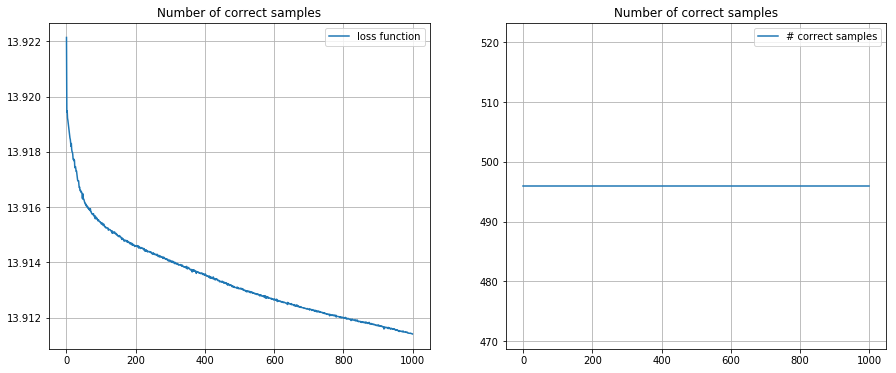

In [16]:
lr = 0.02
loss_lists = []
train_accs = []

Lin1 = modules.Linear(2,25)
Lin2 = modules.Linear(25,25)
Lin3 = modules.Linear(25,2)
act1 = modules.ReLU()
act2 = modules.ReLU()
act3 = modules.Tanh()
act4 = modules.Sigmoid()
layers = [
    Lin1,
    act1,
    Lin2,
    act2,
    Lin3,
    act3]
loss = losses[0]()
#loss = modules.LossBCE()
model = modules.Sequential(layers, loss)
optimizer = optimizers[0](model, lr) 
epochs = 1000
mini_batch_size = 100
loss_list, train_acc = trainAndTest.train(model, optimizer, loss, train_input, train_target,\
                                          epochs, mini_batch_size, verbose = False)
loss_lists.append(loss_list)
train_accs.append(train_acc)

print('optimizer: ',optimizer.name)
print('learning rate: ',lr)
print('minimum loss: ',np.min(loss_list))
print('mean loss: ',np.mean(loss_list))
print('maximum accuracy: ',max(train_acc))
print('On test: ', trainAndTest.test(model,test_input,test_target) )
trainAndTest.plot_loss_accuracy(loss_list, train_acc)

In [25]:
losses_array = np.array(loss_lists)
acc_array = np.array(train_accs)

losses_mean=losses_array.mean(0)
losses_std=losses_array.std(0)

acc_mean = acc_array.mean(0)
acc_std = acc_array.std(0)

losses_std.shape

(1000,)

In [97]:
def plot_mean_and_var(mean, std, style, color,transparency,lenght_array=250, labels=[None,None]):
    plt.plot(range(lenght_array),mean,style+color[0], label=labels[0])
    plt.fill_between(range(lenght_array), mean+(std*1), mean-std, facecolor =color[1], alpha=transparency,label=labels[1])
    return plt

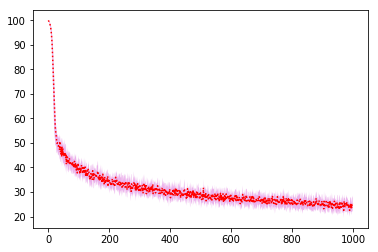

In [23]:
plot_mean_and_var(losses_mean,losses_std,':',['r','m'],transparency=0.3, labels=['mean_','std_'])
plt.show()

In [91]:
import pickle
def read(filename):
    with open (filename, 'rb') as fp:
        itemlist = pickle.load(fp)
    return itemlist
def write(filename,itemlist):
    with open(filename, 'wb') as fp:
        pickle.dump(itemlist, fp)

FOLDER_2 = 'pickles_for_pytorch/'
init_method = 'ours'
write(FOLDER_2+'losses_mean_'+init_method+'.p',losses_mean)
write(FOLDER_2+'losses_std_'+init_method+'.p',losses_std)
write(FOLDER_2+'acc_mean_'+init_method+'.p',acc_mean)
write(FOLDER_2+'acc_std_'+init_method+'.p',acc_std)

In [92]:
init_method = 'ours'
losses_mean_std = read(FOLDER_2+'losses_mean_'+init_method+'.p')
losses_std_std = read(FOLDER_2+'losses_std_'+init_method+'.p')
acc_mean_std = read(FOLDER_2+'acc_mean_'+init_method+'.p')
acc_std_std = read(FOLDER_2+'losses_mean_'+init_method+'.p')

# xavier
init_method = 'pytorch'
losses_mean_xavier = read(FOLDER_2+'losses_mean_'+init_method+'.p')
losses_std_xavier = read(FOLDER_2+'losses_std_'+init_method+'.p')
acc_mean_xavier = read(FOLDER_2+'acc_mean_'+init_method+'.p')
acc_std_xavier = read(FOLDER_2+'losses_mean_'+init_method+'.p')

"""# normal 0, 1
init_method = 'normal_0_1'
losses_mean_0_1 = read(FOLDER_2+'losses_mean_'+init_method+'.p')
losses_std_0_1 = read(FOLDER_2+'losses_std_'+init_method+'.p')
acc_mean_0_1 = read(FOLDER_2+'acc_mean_'+init_method+'.p')
acc_std_0_1 = read(FOLDER_2+'losses_mean_'+init_method+'.p')

# normal 0, 0.01
init_method = 'normal_0_001'
losses_mean_0_001 = read(FOLDER_2+'losses_mean_'+init_method+'.p')
losses_std_0_001 = read(FOLDER_2+'losses_std_'+init_method+'.p')
acc_mean_0_001 = read(FOLDER_2+'acc_mean_'+init_method+'.p')
acc_std_0_001 = read(FOLDER_2+'losses_mean_'+init_method+'.p')
"""



"# normal 0, 1\ninit_method = 'normal_0_1'\nlosses_mean_0_1 = read(FOLDER_2+'losses_mean_'+init_method+'.p')\nlosses_std_0_1 = read(FOLDER_2+'losses_std_'+init_method+'.p')\nacc_mean_0_1 = read(FOLDER_2+'acc_mean_'+init_method+'.p')\nacc_std_0_1 = read(FOLDER_2+'losses_mean_'+init_method+'.p')\n\n# normal 0, 0.01\ninit_method = 'normal_0_001'\nlosses_mean_0_001 = read(FOLDER_2+'losses_mean_'+init_method+'.p')\nlosses_std_0_001 = read(FOLDER_2+'losses_std_'+init_method+'.p')\nacc_mean_0_001 = read(FOLDER_2+'acc_mean_'+init_method+'.p')\nacc_std_0_001 = read(FOLDER_2+'losses_mean_'+init_method+'.p')\n"

In [100]:
my_lenght = 250

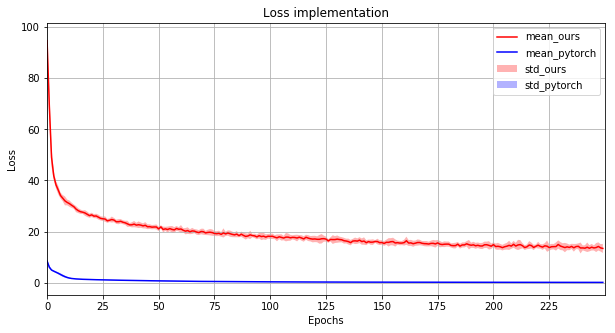

In [108]:
fig = plt.figure(figsize=(10,5))
losses_to_plot = [(losses_mean_std,losses_std_std),(losses_mean_xavier,losses_std_xavier)]
accs_to_plot = [(acc_mean_std,acc_std_std),(acc_mean_xavier,acc_std_xavier)]

colors = ['r','b','g','c']
inits = ['ours', 'pytorch','normal_0,1','normal_0,0.01']
for i,(mean, std) in enumerate(losses_to_plot[:2]):
    plot_mean_and_var(mean,std,'-',[colors[i],colors[i]],transparency=0.3,\
                      labels=['mean_'+inits[i],'std_'+inits[i]],lenght_array=my_lenght)
plt.legend()
plt.grid()
plt.legend()
plt.xlabel('Epochs')
plt.xlim(0,my_lenght)
plt.xticks(range(0,my_lenght,my_lenght//10))
plt.ylabel('Loss')
plt.title('Loss implementation')
plt.show()
fig.savefig(FOLDER_2+'losses_per_impl_bis')

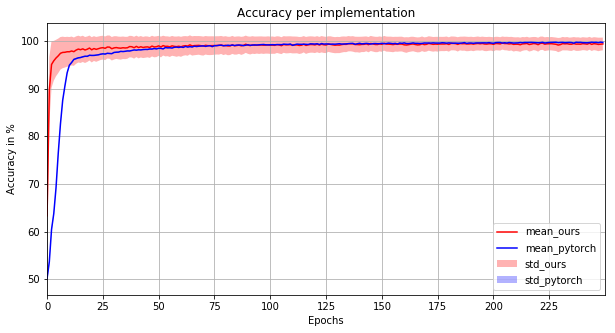

In [107]:
fig2 = plt.figure(figsize=(10,5))
for i,(mean, std) in enumerate(accs_to_plot[:]):
    plot_mean_and_var(mean/10,std/10,'-',[colors[i],colors[i]],transparency=0.3, labels=['mean_'+inits[i],'std_'+inits[i]])
plt.legend()
plt.grid()
plt.legend()
plt.xlabel('Epochs')
plt.xlim(0,my_lenght)
plt.xticks(range(0,my_lenght,my_lenght//10))
plt.ylabel('Accuracy in %')
plt.title('Accuracy per implementation')
plt.show()
fig2.savefig(FOLDER_2+'acc_per_impl_bis')

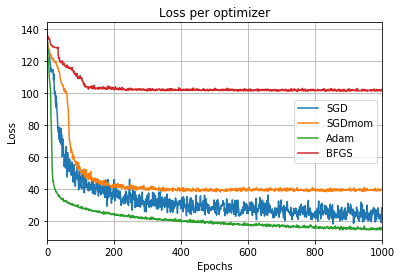

In [62]:
p0 = plt.figure(0)
loss_lists = [loss_list_sgd, loss_list_mom, loss_list_adam, loss_list_BFGS_3]
train_accs = [train_acc_sgd, train_acc_mom, train_acc_adam, train_acc_BFGS_3]
labels=['SGD','SGDmom','Adam','BFGS']
for i,loss_list in enumerate(loss_lists):
    plt.plot(loss_list, label=labels[i])
plt.grid()
plt.legend()
plt.xlabel('Epochs')
plt.xlim(0,1000)
plt.ylabel('Loss')
plt.title('Loss per optimizer')
plt.show()
p0.savefig(PLOT_FOLDER+'loss per optimizer9')

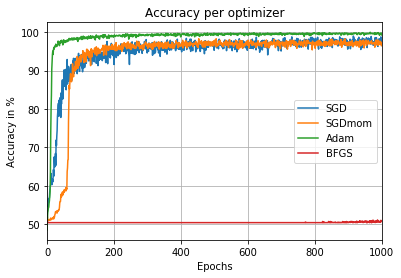

In [63]:
p1 = plt.figure(3)
labels=['SGD','SGDmom','Adam','BFGS']
for i,train_acc in enumerate(train_accs):
    plt.plot([x/train_input.size(0)*100 for x in train_acc], label=labels[i])
plt.grid()
plt.legend()
plt.xlabel('Epochs')
plt.xlim(0,1000)
plt.ylabel('Accuracy in %')
plt.title('Accuracy per optimizer')
plt.show()
p1.savefig(PLOT_FOLDER+'accuracy per optimizer9')

# Variations: